In [1]:
# Importing all required modules >>

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data >>

df = pd.read_excel('Data_Train.xlsx')

In [3]:
# Explore the data >>

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# 6K Rows & 13 Columns >>

df.shape

(6019, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
# Null values >>

df.isnull().sum()/len(df)*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

<AxesSubplot:>

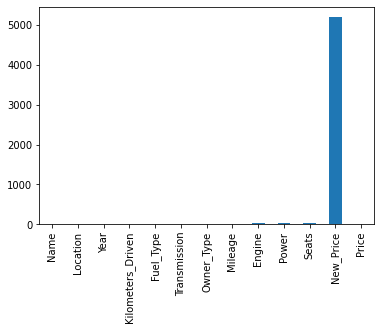

In [8]:
df.isnull().sum().plot(kind='bar')

In [9]:
df.columns[df.isnull().any()]

Index(['Mileage', 'Engine', 'Power', 'Seats', 'New_Price'], dtype='object')

In [10]:
# Remove the columns >>
df.drop(['New_Price'],axis=1,inplace=True)

In [11]:
# Drop the Null values >>
df.dropna(inplace=True)

In [12]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<AxesSubplot:>

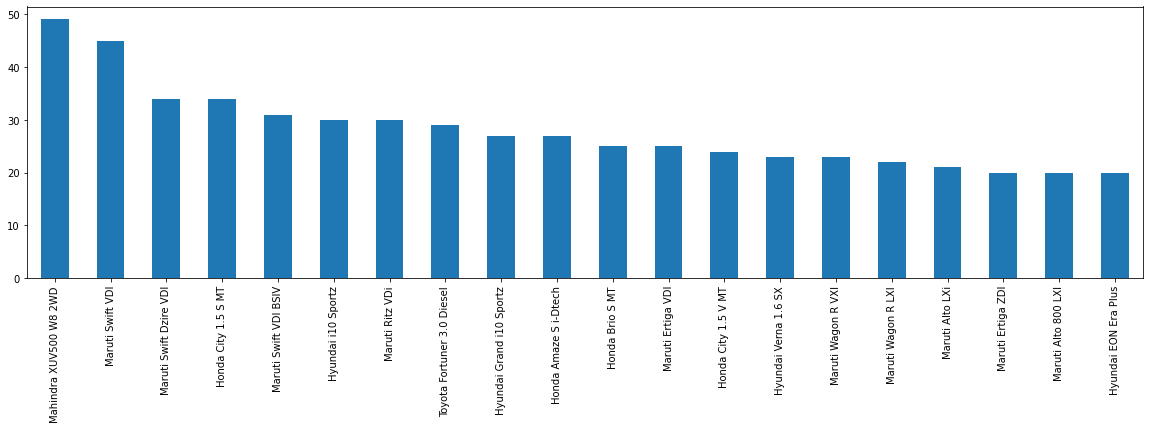

In [13]:
plt.figure(figsize=(20,5))
df['Name'].value_counts()[:20].plot(kind="bar")

In [14]:
df['Company'] = df['Name'].apply(lambda x:x.split()[0])

In [15]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


<AxesSubplot:>

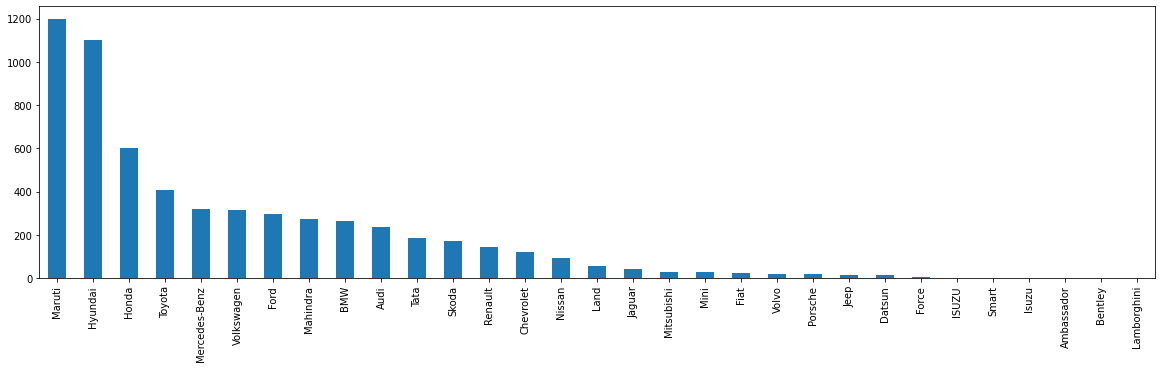

In [16]:
plt.figure(figsize=(20,5))
df['Company'].value_counts().plot(kind="bar")

In [17]:
df.drop(['Name'],axis=1,inplace=True)

In [18]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


<AxesSubplot:>

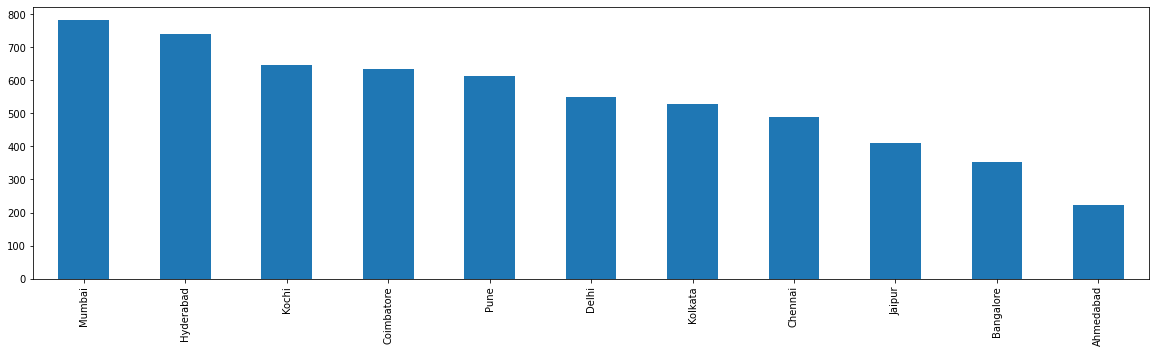

In [19]:
plt.figure(figsize=(20,5))
df['Location'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

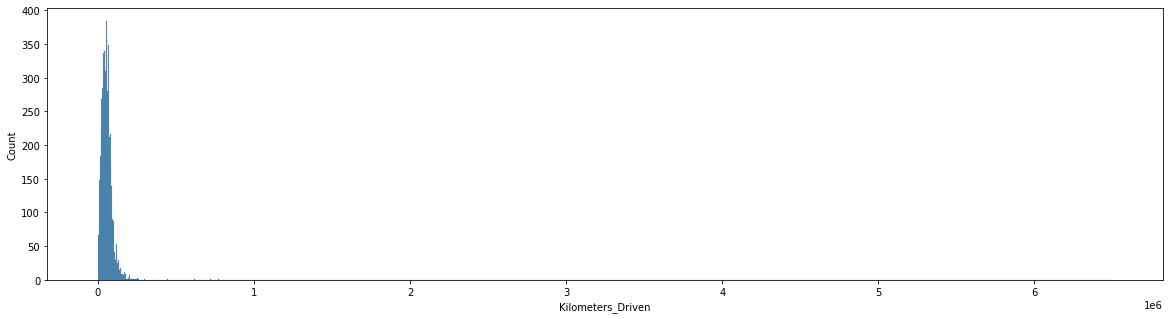

In [20]:
plt.figure(figsize=(20,5))
sns.histplot(df['Kilometers_Driven'])

<AxesSubplot:xlabel='Kilometers_Driven'>

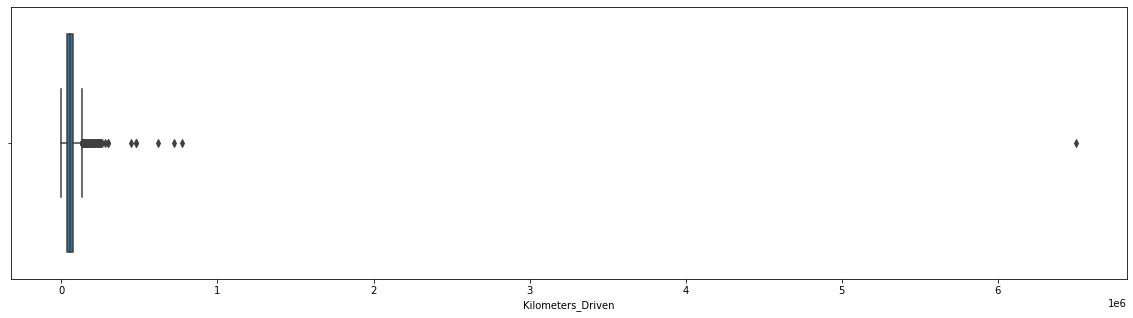

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(df['Kilometers_Driven'])

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

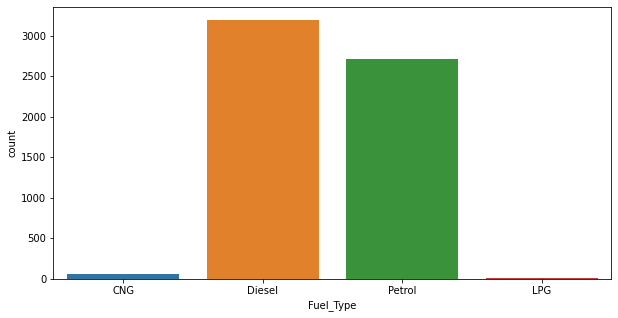

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['Fuel_Type'])

<AxesSubplot:xlabel='Company', ylabel='count'>

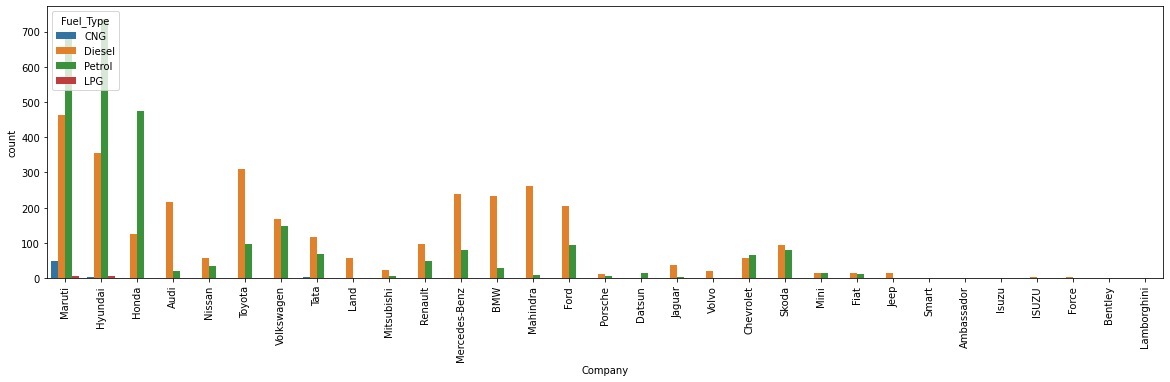

In [23]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(df['Company'],hue='Fuel_Type',data=df)

In [24]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

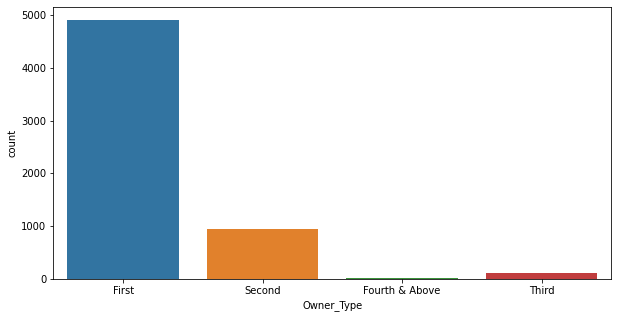

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['Owner_Type'])

<AxesSubplot:xlabel='Seats', ylabel='count'>

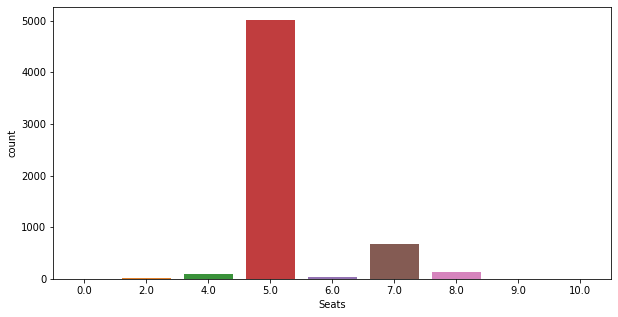

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Seats'])

In [27]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [28]:
import nums_from_string

df['Mileage'] = df['Mileage'].apply(lambda x: nums_from_string.get_nums(x)[0] )
df['Engine'] = df['Engine'].apply(lambda x: nums_from_string.get_nums(x)[0] )
df['Powers'] = df['Power'].apply(lambda x:x.split()[0])

In [29]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Powers
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75,Maruti,58.16
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50,Hyundai,126.2
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50,Honda,88.7
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00,Maruti,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74,Audi,140.8


In [30]:
print(df.columns[df.dtypes=="object"].tolist())

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Power', 'Company', 'Powers']


In [31]:
df[df['Powers']=='null'].head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Powers
76,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null bhp,5.0,2.00,Ford,null
79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null bhp,5.0,1.30,Hyundai,null
89,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null bhp,5.0,2.10,Hyundai,null
120,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null bhp,5.0,0.85,Hyundai,null
143,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null bhp,5.0,1.67,Hyundai,null


In [32]:
df = df[df['Powers']!='null']

In [33]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Powers
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75,Maruti,58.16
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50,Hyundai,126.2
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50,Honda,88.7
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00,Maruti,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74,Audi,140.8


In [34]:
df['Powers'] = df['Powers'].astype('float')
df.drop(['Power'],axis=1,inplace=True)

In [35]:
print(df.columns[df.dtypes=="object"].tolist())

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Company']


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

category = df.columns[df.dtypes=="object"]

for i in category:
    df[i] = le.fit_transform(df[i])

In [37]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Powers
0,9,2010,72000,0,1,0,26.60,998,5.0,1.75,18,58.16
1,10,2015,41000,1,1,0,19.67,1582,5.0,12.50,10,126.20
2,2,2011,46000,3,1,0,18.20,1199,5.0,4.50,9,88.70
3,2,2012,87000,1,1,0,20.77,1248,7.0,6.00,18,88.76
4,3,2013,40670,1,0,2,15.20,1968,5.0,17.74,1,140.80


In [38]:
df.dtypes

Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine                 int64
Seats                float64
Price                float64
Company                int32
Powers               float64
dtype: object

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(['Price'],axis=1)
y = df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [43]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [45]:
rf.fit(X_train_sc,y_train)

RandomForestRegressor()

In [46]:
rf.score(X_test_sc,y_test)

0.8413487401693486

In [47]:
y_pred = rf.predict(X_test_sc)

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

21.57584340673776

In [53]:
Result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [57]:
Result = Result.reset_index(drop=True)

In [58]:
Result.sample(10)

,Actual,Predicted
569,7.99,11.3020
923,8.10,10.0835
970,2.90,3.0311
757,40.00,45.6341
18,69.50,72.9880
1296,11.50,14.6403
1305,3.50,2.2952
142,6.15,7.4258
1240,5.50,7.7598
482,7.67,6.9167


In [59]:
Result['Error'] = Result['Actual']-Result['Predicted']

In [61]:
Result.sample(30)

,Actual,Predicted,Error
266,5.90,6.3594,-0.4594
912,2.35,3.3879,-1.0379
1115,5.37,7.0444,-1.6744
94,0.80,1.1269,-0.3269
1254,9.44,7.8236,1.6164
1753,2.75,2.4202,0.3298
1355,6.55,5.8063,0.7437
1238,7.50,5.6603,1.8397
948,1.60,1.2909,0.3091
1040,3.30,3.9345,-0.6345


<AxesSubplot:xlabel='Error', ylabel='Count'>

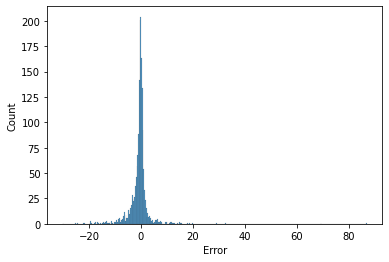

In [62]:
sns.histplot(Result['Error'])

<AxesSubplot:xlabel='Error'>

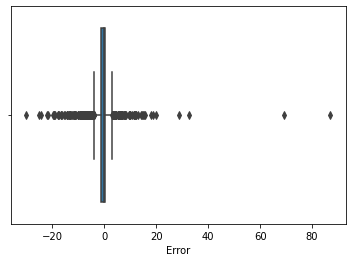

In [66]:
sns.boxplot(Result['Error'])

In [72]:
Result[ (Result['Error']>20) | (Result['Error']<-20) ]

,Actual,Predicted,Error
19,120.00,50.6472,69.3528
247,160.00,72.9852,87.0148
307,45.52,67.4168,-21.8968
450,44.00,69.2944,-25.2944
471,59.00,30.0918,28.9082
637,26.76,48.3421,-21.5821
1076,48.00,78.1580,-30.1580
1193,97.07,64.4823,32.5877
1483,28.00,52.4124,-24.4124
